# Atividade Prática 1.2 - Flores Íris

* Disciplina _Inteligência Artificial Aplicada_
* Professora: Elloá B. Guedes (ebgcosta@uea.edu.br)
* Data de apresentação: 12 de janeiro de 2023
* Data limite de entrega: 19 de janeiro de 2023


## Equipe
* Integrante 1: *Aurelio Aquino*
* Integrante 2: *Jailson Bina*
* Integrante 3: *Sthephany Costa*
* Integrante 4: *Erica Veras*
* Integrante 5: *Michelle de Carvalho*
* Integrante 6: *Guilherme Rodamilans*
* Integrante 7: *Fabiano Dolzanes*


## Contexto: Flores Íris

O objetivo desta atividade prática é utilizar as ferramentas de Machine Learning no ambiente Python com o uso da biblioteca pandas resolver uma tarefa fde classificação multi-classe.

## Base de Dados
Disponível em https://archive.ics.uci.edu/dataset/53/iris

### Bibliotecas

A célula a seguir está reservada para importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

### Preparando os dados para treinamento

1. Abra o dataset, visualize o cabeçalho
2. Atribua a uma variável Y o atributo preditor 'species'
3. Armazene os demais atributos em uma variável X
4. Efetue uma partição do tipo Holdout 60/40

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/My Drive/iaa/iris.csv', sep = ';') 
df = pd.read_csv('iris.csv')

In [3]:
X = df.drop(columns=['variety'])
Y = df['variety']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Treinando Modelos - Árvore de Decisão

1. Instancie uma árvore de decisão com parâmetros padrões
2. Treine e árvore de decisão
3. Se o pacote graphviz estiver disponível, exporte a árvore de decisão produzida e visualize-a

In [5]:
# Adicionar no cabeçalho: from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [6]:
y_prev = clf.predict(X_test)
accTree = accuracy_score(Y_test, y_prev)
accTree

0.9111111111111111

In [7]:
# Pacote graphviz para visualização da árvore de decisão produzida.
# Saída disponível no arquivo iris-tree.pdf
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["sepalLength","sepalWidth","petalLength","petalWidth"],  
                         class_names=["setosa","versicolor","virginica"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris-tree") 

'iris-tree.pdf'

### Testando Modelos - Árvore de Decisão

1. Obtenha as previsões desta árvore para o conjunto de testes
2. Calcule a acurácia deste modelo
   2.1 Da biblioteca sklearn.metrics efetue a importação do accuracy_score
3. Obtenha a matriz de confusão destas previsões
   3.1 Da biblioteca sklearn.metrics fetue a importação do confusion_matrix
4. Obtenha uma visualização mais agradável desta matriz de confusão. 
   4.1 Visualize o arquivo iris-confusao.pdf

In [8]:
matrizcf = confusion_matrix(Y_test, y_prev)

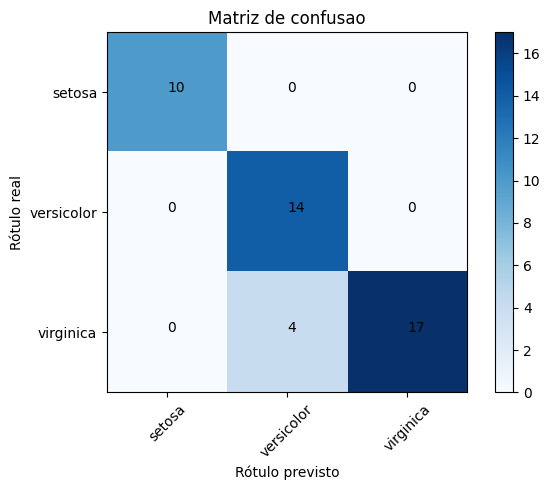

In [9]:
# Plotando matriz de confusão
# a matriz de confusão deve estar numa variável matrizcf
import matplotlib.pyplot as plt
import itertools

cm = matrizcf
cmap=plt.cm.Blues
normalize = False
classes =  ["setosa","versicolor","virginica"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Matriz de confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt))

plt.tight_layout()
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
plt.savefig("iris-confusao.pdf")
plt.show()


### Comparando Modelos - k-Vizinhos Mais Próximos

1. Treine um classificador k-Vizinhos Mais Próximos para este problema, com vizinhança de 3
2. Obtenha a acurácia deste modelo para o conjunto de testes
3. Considerando esta métrica, qual modelo tem melhor desempenho nesta tarefa?

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(3)
knn.fit(X_train, Y_train)
y_prev2 = knn.predict(X_test)
accKnn = accuracy_score(Y_test, y_prev2)
accKnn

0.9555555555555556

In [12]:
if accTree > accKnn:
    print('Melhor desempenho: Árvore de Decisão')
else:
    print('Melhor desempenho: KNN')

Melhor desempenho: KNN
